In [1]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import soundfile as sf

#KYW inst
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -1.0
Max Value: 0.999969482421875


In [2]:
ir = wavfile.read('/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Impulse Responses/Recorded Responses/REW Responses/church 1-48k.wav')
ir = ir[1]

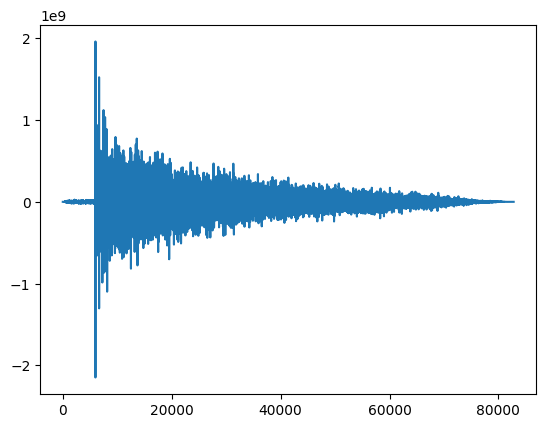

In [3]:
plt.plot(ir)

In [4]:
sd.play(ir, fs)

In [5]:
# Convolution with IR
data_L_conv = np.convolve(data[:,0], ir)
data_R_conv = np.convolve(data[:,1], ir)


#Normalising and outputting
data_L_conv = ((data_L_conv - np.min(data_L_conv)) / (np.max(data_L_conv) - np.min(data_L_conv))) * 2 - 1
data_R_conv = ((data_R_conv - np.min(data_R_conv)) / (np.max(data_R_conv) - np.min(data_R_conv))) * 2 - 1

data_conv_IR = np.vstack((data_L_conv, data_R_conv))
data_conv_IR = data_conv_IR.T

In [6]:
sd.play(data_conv_IR, fs)